### Group ID: 124
#### Group Members Name with Student ID:

| Student Name       | Student ID    | Contribution |
|--------------------|---------------|--------------|
| Chakshu            | 2023aa05280   | 100%         |
| Gali Jahnavi       | 2023aa05684   | 100%         |
| Aashaank Pratap    | 2023aa05023   | 100%         |
| Shivam Sahil       | 2023aa05663   | 100%         

In [ ]:
# Installing necessary dependencies
!pip install tensorflow numpy matplotlib

In [ ]:
# Import necessary dependencies
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoded vectors
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Define a function to create and compile models
def create_model(model_type, optimizer):
    if model_type == 'CNN':
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])
    elif model_type == 'GRU':
        model = models.Sequential([
            layers.GRU(64, input_shape=(28, 28)),
            layers.Dense(10, activation='softmax')
        ])
    elif model_type == 'LSTM':
        model = models.Sequential([
            layers.LSTM(64, input_shape=(28, 28)),
            layers.Dense(10, activation='softmax')
        ])
    else:
        raise ValueError("Invalid model type")

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Define optimizers to compare
optimizers_list = [
    optimizers.SGD(learning_rate=0.01),
    optimizers.Adam(learning_rate=0.001),
    optimizers.RMSprop(learning_rate=0.001)
]

# Train and evaluate models
results = {}
for model_type in ['CNN', 'GRU', 'LSTM']:
    results[model_type] = {}
    for optimizer_class in [optimizers.SGD, optimizers.Adam, optimizers.RMSprop]:
        optimizer = optimizer_class(learning_rate=0.001 if optimizer_class != optimizers.SGD else 0.01)  # Adjust learning rate accordingly
        print(f"Training {model_type} with {optimizer.__class__.__name__}")
        model = create_model(model_type, optimizer)
        history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2, verbose=0)
        test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
        results[model_type][optimizer.__class__.__name__] = {
            'test_accuracy': test_acc,
            'history': history.history
        }

Training CNN with SGD
Training CNN with Adam
Training CNN with RMSprop
Training GRU with SGD
Training GRU with Adam
Training GRU with RMSprop
Training LSTM with SGD
Training LSTM with Adam
Training LSTM with RMSprop


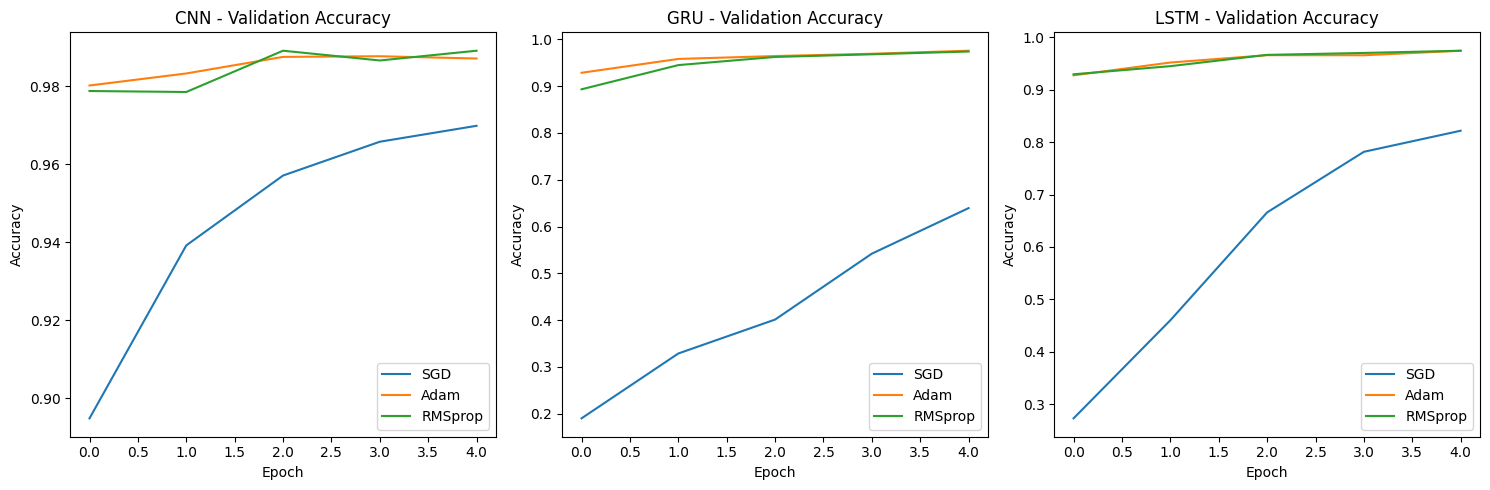

In [ ]:
# Plotting results
plt.figure(figsize=(15, 5))
for i, model_type in enumerate(['CNN', 'GRU', 'LSTM']):
    plt.subplot(1, 3, i+1)
    for optimizer in optimizers_list:
        opt_name = optimizer.__class__.__name__
        plt.plot(results[model_type][opt_name]['history']['val_accuracy'], label=opt_name)
    plt.title(f'{model_type} - Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Print test accuracies
for model_type in results:
    print(f"\n{model_type} Test Accuracies:")
    for optimizer in results[model_type]:
        print(f"{optimizer}: {results[model_type][optimizer]['test_accuracy']:.4f}")


CNN Test Accuracies:
SGD: 0.9717
Adam: 0.9891
RMSprop: 0.9910

GRU Test Accuracies:
SGD: 0.6369
Adam: 0.9751
RMSprop: 0.9715

LSTM Test Accuracies:
SGD: 0.8168
Adam: 0.9723
RMSprop: 0.9745


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# Copy the notebook to the current directory
!cp 'drive/My Drive/Colab Notebooks/DNN_assignment_2b_group124.ipynb' ./

# Convert the notebook to PDF while keeping the code and output
!jupyter nbconvert --to pdf "DNN_assignment_2b_group124.ipynb"

# Download the generated PDF
from google.colab import files
files.download('DNN_assignment_2b_group124.ipynb')